In [1]:
import matplotlib.pyplot as plt
import numpy as np

from Annotated_MNIST import Annotated_MNIST

%matplotlib inline

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Low: 50
Normal: 485
High: 600



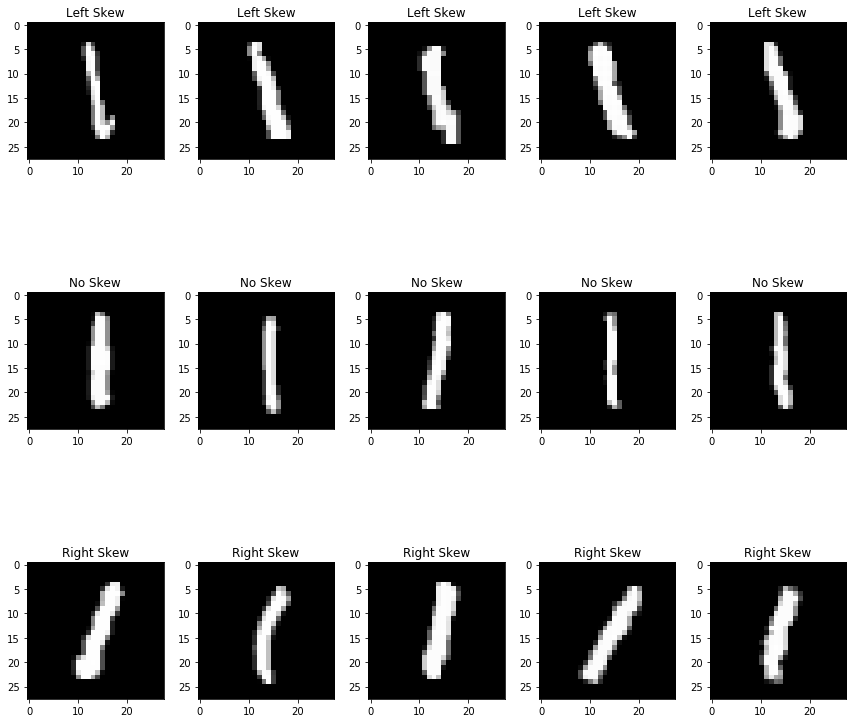

In [2]:
test = Annotated_MNIST(train=False)
images = test.images
l_idx, n_idx, h_idx = test.skew_stats(num=1, bound=6, skew_range=25)

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(3, 5, 5 * 0 + (i + 1))
    plt.imshow(images[l_idx[20 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Left Skew')
    
    plt.subplot(3, 5, 5 * 1 + (i + 1))
    plt.imshow(images[n_idx[20 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('No Skew')
    
    plt.subplot(3, 5, 5 * 2 + (i + 1))
    plt.imshow(images[h_idx[40 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Right Skew')

plt.tight_layout()

Low: 290
Normal: 408
High: 311



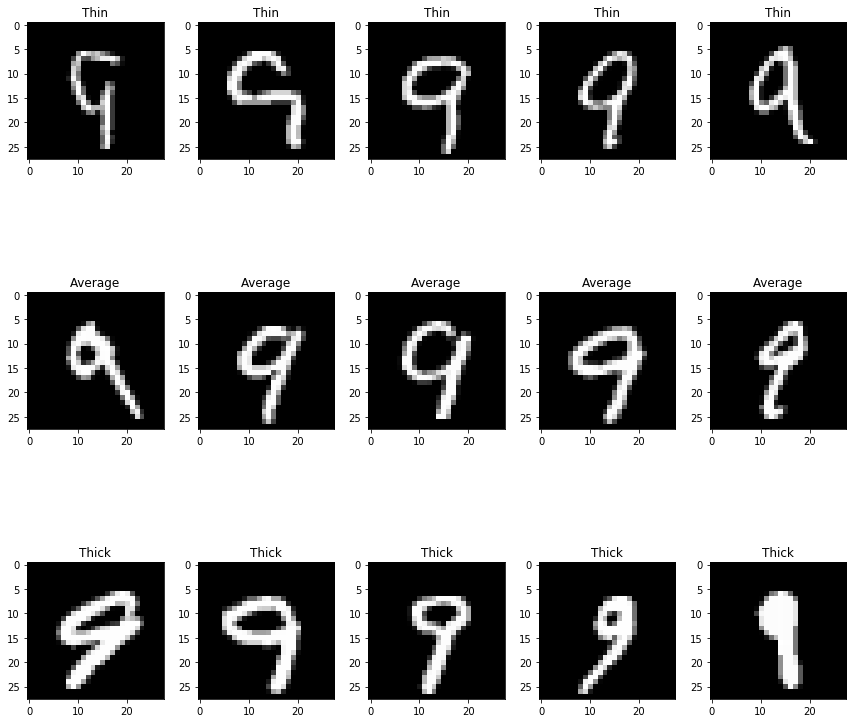

In [3]:
l_idx, n_idx, h_idx = test.thickness_stats(num=9, line=22, thickness_range=0)

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(3, 5, 5 * 0 + (i + 1))
    plt.imshow(images[l_idx[i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Thin')
    
    plt.subplot(3, 5, 5 * 1 + (i + 1))
    plt.imshow(images[n_idx[i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Average')
    
    plt.subplot(3, 5, 5 * 2 + (i + 1))
    plt.imshow(images[h_idx[20 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Thick')

plt.tight_layout()

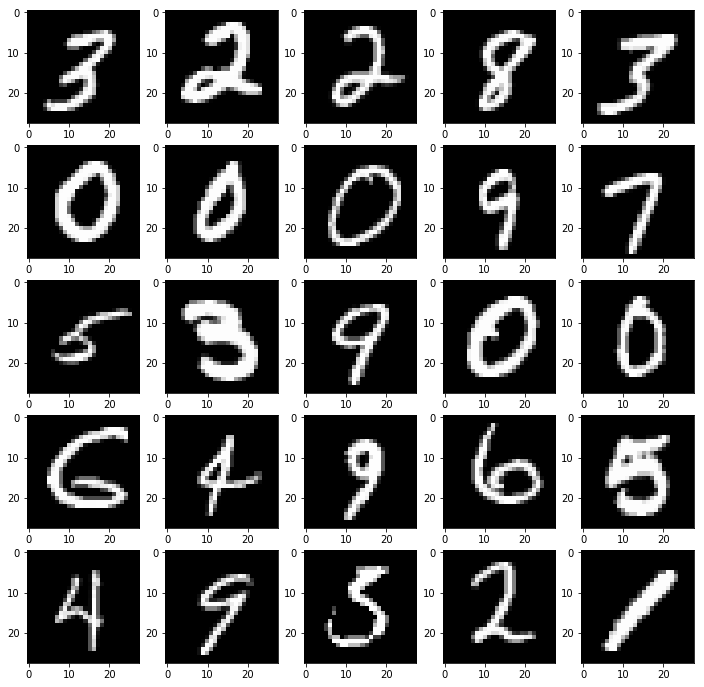

In [4]:
for i in range(100):
    descriptions, batch_xs, batch_ys = test.next_batch(128, resize=False, convert_to_idx=False)

imgs = np.reshape(batch_xs, (-1, 28, 28))

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, (i + 1))
    plt.imshow(imgs[i], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))

In [5]:
descriptions

[['thick', 'number', 'three', 'with', 'right', 'skew'],
 ['normal', 'number', 'two', 'with', 'right', 'skew'],
 ['thin', 'number', 'two', 'with', 'average', 'skew'],
 ['normal', 'number', 'eight', 'with', 'right', 'skew'],
 ['normal', 'number', 'three', 'with', 'right', 'skew'],
 ['normal', 'number', 'zero', 'with', 'average', 'skew'],
 ['normal', 'number', 'zero', 'with', 'average', 'skew'],
 ['thin', 'number', 'zero', 'with', 'average', 'skew'],
 ['normal', 'number', 'nine', 'with', 'average', 'skew'],
 ['normal', 'number', 'seven', 'with', 'average', 'skew'],
 ['normal', 'number', 'five', 'with', 'right', 'skew'],
 ['normal', 'number', 'three', 'with', 'left', 'skew'],
 ['normal', 'number', 'nine', 'with', 'right', 'skew'],
 ['thick', 'number', 'zero', 'with', 'average', 'skew'],
 ['thin', 'number', 'zero', 'with', 'average', 'skew'],
 ['normal', 'number', 'six', 'with', 'left', 'skew'],
 ['thin', 'number', 'four', 'with', 'right', 'skew'],
 ['normal', 'number', 'nine', 'with', 'ave

In [6]:
test.generate_sentences(10, divide=True, convert_to_idx=False)

[['thin', 'number', 'zero', 'with', 'left', 'skew'],
 ['thin', 'number', 'three', 'with', 'left', 'skew'],
 ['normal', 'number', 'two', 'with', 'left', 'skew'],
 ['thick', 'number', 'five', 'with', 'left', 'skew'],
 ['thick', 'number', 'four', 'with', 'right', 'skew'],
 ['thin', 'number', 'four', 'with', 'right', 'skew'],
 ['thin', 'number', 'five', 'with', 'left', 'skew'],
 ['thin', 'number', 'nine', 'with', 'average', 'skew'],
 ['thick', 'number', 'eight', 'with', 'average', 'skew'],
 ['thin', 'number', 'nine', 'with', 'left', 'skew']]

In [7]:
a = test.generate_sentences(10, divide=False, convert_to_idx=False)
print(a)

['thick number five with average skew', 'thick number four with left skew', 'normal number five with average skew', 'thick number eight with left skew', 'thick number four with right skew', 'thin number three with left skew', 'normal number three with average skew', 'thin number seven with right skew', 'thin number one with right skew', 'normal number eight with average skew']


In [8]:
b = test.convert_to_idx(a)
print(b)

[[2, 3, 9, 14, 16, 18], [2, 3, 8, 14, 15, 18], [1, 3, 9, 14, 16, 18], [2, 3, 12, 14, 15, 18], [2, 3, 8, 14, 17, 18], [0, 3, 7, 14, 15, 18], [1, 3, 7, 14, 16, 18], [0, 3, 11, 14, 17, 18], [0, 3, 5, 14, 17, 18], [1, 3, 12, 14, 16, 18]]


In [9]:
c = test.convert_to_word(b, concat=True)
print(c)

['thick number five with average skew', 'thick number four with left skew', 'normal number five with average skew', 'thick number eight with left skew', 'thick number four with right skew', 'thin number three with left skew', 'normal number three with average skew', 'thin number seven with right skew', 'thin number one with right skew', 'normal number eight with average skew']


In [10]:
d = test.convert_to_word(b, concat=False)
print(d)

[['thick', 'number', 'five', 'with', 'average', 'skew'], ['thick', 'number', 'four', 'with', 'left', 'skew'], ['normal', 'number', 'five', 'with', 'average', 'skew'], ['thick', 'number', 'eight', 'with', 'left', 'skew'], ['thick', 'number', 'four', 'with', 'right', 'skew'], ['thin', 'number', 'three', 'with', 'left', 'skew'], ['normal', 'number', 'three', 'with', 'average', 'skew'], ['thin', 'number', 'seven', 'with', 'right', 'skew'], ['thin', 'number', 'one', 'with', 'right', 'skew'], ['normal', 'number', 'eight', 'with', 'average', 'skew']]
